<p align="right">David Rodríguez Elipe</p>

# Logistic Regression Concept
A logistic regression is a prediction algorithm that weigths input parameteres into a single output. It is used to predict a model with multiple input data and specific output values.

$$SIGMOID$$
$$\displaystyle Y_{i}\ \sim B(p_{i},n_{i}),{\text{ for }}i=1,\dots ,m$$
![decision function](https://upload.wikimedia.org/wikipedia/commons/8/88/Logistic-curve.svg)

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import sklearn as sk
from sklearn.linear_model import LogisticRegression

<AxesSubplot:>

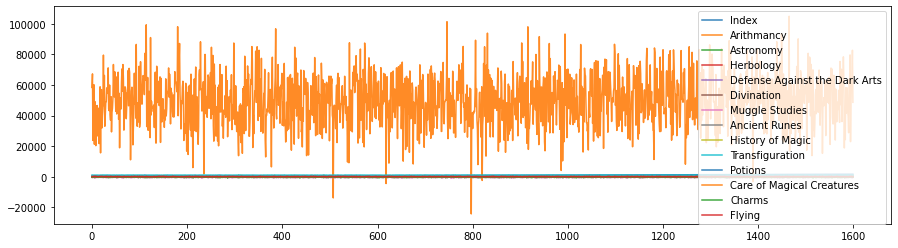

In [2]:
df = pd.read_csv('./datasets/dataset_train.csv')
df.fillna(method='ffill',inplace=True, axis=0)
df.plot(figsize=(15,4), alpha=0.9)

# Data preprocessing
Non-numeric values need to be converted. Unnecessary features can be dropped.

In [3]:
def normalize(df):
    # copy the dataframe
    df_norm = df.copy()
    # apply min-max scaling
    for column in df_norm.columns:
        df_norm[column] = (df_norm[column] - df_norm[column].min()) / (df_norm[column].max() - df_norm[column].min())
        
    return df_norm

In [4]:
df

,Index,Hogwarts House,First Name,Last Name,Birthday,Best Hand,Arithmancy,Astronomy,Herbology,Defense Against the Dark Arts,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Care of Magical Creatures,Charms,Flying
0,0,Ravenclaw,Tamara,Hsu,2000-03-30,Left,58384.0,-487.886086,5.727180,4.878861,4.722,272.035831,532.484226,5.231058,1039.788281,3.790369,0.715939,-232.79405,-26.89
1,1,Slytherin,Erich,Paredes,1999-10-14,Right,67239.0,-552.060507,-5.987446,5.520605,-5.612,-487.340557,367.760303,4.107170,1058.944592,7.248742,0.091674,-252.18425,-113.45
2,2,Ravenclaw,Stephany,Braun,1999-11-03,Left,23702.0,-366.076117,7.725017,3.660761,6.140,664.893521,602.585284,3.555579,1088.088348,8.728531,-0.515327,-227.34265,30.42
3,3,Gryffindor,Vesta,Mcmichael,2000-08-19,Left,32667.0,697.742809,-6.497214,-6.977428,4.026,-537.001128,523.982133,-4.809637,920.391449,0.821911,-0.014040,-256.84675,200.64
4,4,Gryffindor,Gaston,Gibbs,1998-09-27,Left,60158.0,436.775204,-7.820623,-6.977428,2.236,-444.262537,599.324514,-3.444377,937.434724,4.311066,-0.264070,-256.38730,157.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,1595,Gryffindor,Jung,Blank,2001-09-14,Right,49009.0,354.280086,-4.541837,-3.542801,5.702,-497.235066,618.220213,-5.231721,964.219853,3.389086,-0.649983,-250.39401,185.83
1596,1596,Slytherin,Shelli,Lock,1998-03-12,Left,63296.0,367.531174,6.061064,-3.675312,1.757,-643.271092,445.827565,2.238112,1056.147366,5.825263,-0.333962,-246.42719,44.80
1597,1597,Gryffindor,Benjamin,Christensen,1999-10-24,Right,63905.0,544.018925,-3.203269,-5.440189,6.065,-385.150457,635.211486,-5.984257,953.866685,1.709808,0.071569,-251.63679,198.47
1598,1598,Hufflepuff,Charlotte,Dillon,2001-09-21,Left,82713.0,453.676219,3.442831,-4.536762,6.738,-831.741123,383.444937,3.813111,1087.949205,3.904100,-0.531875,-246.19072,-76.81


# Logistic Regression: applying it

In [5]:
from LogisticRegression import LogisticRegression as lr

In [6]:
houses = df['Hogwarts House'].unique()
houses

array(['Ravenclaw', 'Slytherin', 'Gryffindor', 'Hufflepuff'], dtype=object)

As we see, the date of birth doesn't seem to be a determining feature, so we can drop them.

In [7]:
df = df.drop(['Birthday','First Name','Last Name'], axis=1)
df['Best Hand'] = df['Best Hand'].astype(str).map({'Left':'0','Right':'1'})
df['Best Hand'] = pd.to_numeric(df['Best Hand'])

## Logistic Regression
Training the data

In [8]:
dic0 = {
    'Ravenclaw':0,
    'Slytherin':1,
    'Gryffindor':2,
    'Hufflepuff':3
}
dicrav = {
    'Ravenclaw':1,
    'Slytherin':0,
    'Gryffindor':0,
    'Hufflepuff':0
}
dicgry = {
    'Ravenclaw':0,
    'Slytherin':0,
    'Gryffindor':1,
    'Hufflepuff':0
}
dicsly = {
    'Ravenclaw':0,
    'Slytherin':1,
    'Gryffindor':0,
    'Hufflepuff':0
}
dichuf = {
    'Ravenclaw':0,
    'Slytherin':0,
    'Gryffindor':0,
    'Hufflepuff':1
}
dic2 = {
    0:'Ravenclaw',
    1:'Slytherin',
    2:'Gryffindor',
    3:'Hufflepuff'
}

In [9]:
y = np.array(df['Hogwarts House'].map(dicrav))
x = np.array(normalize(df.iloc[:,2:]))
ravenclaw = lr([1,1,1,1,1,1,1,1,1,1,1,1,1,1,1])
rav_theta = ravenclaw.fit(x,y)
ravenclaw_ypred = ravenclaw.predict(x)

In [10]:
y = np.array(df['Hogwarts House'].map(dicsly))
x = np.array(normalize(df.iloc[:,2:]))
slytherin = lr([1,1,1,1,1,1,1,1,1,1,1,1,1,1,1])
sly_theta = slytherin.fit(x,y)
slytherin_ypred = slytherin.predict(x)

In [11]:
y = np.array(df['Hogwarts House'].map(dicgry))
x = np.array(normalize(df.iloc[:,2:]))
gryffindor = lr([1,1,1,1,1,1,1,1,1,1,1,1,1,1,1])
gryffindor_theta = gryffindor.fit(x,y)
gryffindor_ypred = gryffindor.predict(x)

In [12]:
y = np.array(df['Hogwarts House'].map(dichuf))
x = np.array(normalize(df.iloc[:,2:]))
hufflepuff = lr([1,1,1,1,1,1,1,1,1,1,1,1,1,1,1])
hufflepuff_theta = hufflepuff.fit(x,y)
hufflepuff_ypred = hufflepuff.predict(x)

In [13]:
result = np.c_[ravenclaw_ypred, slytherin_ypred, gryffindor_ypred,hufflepuff_ypred]

In [14]:
prediction = np.zeros(len(y))
for index, row in enumerate(result):
    if(index == 3):
        print(row)
    if (max(row) == row[0]):
        prediction[index] = 0.
    elif (max(row) == row[1]):
        prediction[index] = 1.
    elif (max(row) == row[2]):
        prediction[index] = 2.
    elif (max(row) == row[3]):
        prediction[index] = 3.
prediction = prediction.astype(int)

[0.4559159  0.48562454 0.72032737 0.53279809]


In [15]:
print(prediction)

[0 1 0 ... 2 3 3]


In [16]:
print(np.array(df['Hogwarts House'].map(dic0)))

[0 1 0 ... 2 3 3]


In [17]:
orig = np.array(df['Hogwarts House'].map(dic0))
pred = prediction.astype(int)
accouracy = 0
for i, value in enumerate(orig):
    if (orig[i] == pred[i]):
        accouracy +=1
accouracy = accouracy / len(pred) * 100
print('Accouracy: {:.5}%'.format(accouracy))

Accouracy: 98.188%


In [18]:
thetas = np.c_[ravenclaw.theta, slytherin.theta, gryffindor.theta, hufflepuff.theta]
f = open('weights.csv','w')
f.write('Ravenclaw,Slytherin,Gryffindor,Hufflepuff\n')
for row in thetas:
    f.write(f'{row[0]},{row[1]},{row[2]},{row[3]}\n')
f.close()

# Testing

In [19]:
df_test = pd.read_csv('./datasets/dataset_test.csv')
df_test.fillna(0,inplace=True)
df_test = df_test.drop(['Birthday','First Name','Last Name'], axis=1)
df_test['Best Hand'] = df_test['Best Hand'].astype(str).map({'Left':'0','Right':'1'})
df_test['Best Hand'] = pd.to_numeric(df_test['Best Hand'])
x_test = np.array(normalize(df_test.iloc[:,2:]))
ravenclaw_test = ravenclaw.predict(x_test)
slytherin_test = slytherin.predict(x_test)
gryffindor_test = gryffindor.predict(x_test)
hufflepuff_test = hufflepuff.predict(x_test)
result = np.c_[ravenclaw_test, slytherin_test, gryffindor_test,hufflepuff_test]


In [20]:
df_test

,Index,Hogwarts House,Best Hand,Arithmancy,Astronomy,Herbology,Defense Against the Dark Arts,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Care of Magical Creatures,Charms,Flying
0,0,0.0,1,41642.0,696.096071,3.020172,-6.960961,7.996,-365.151850,393.138185,4.207691,1046.742736,3.668983,0.373853,-244.48172,-13.62
1,1,0.0,0,45352.0,-370.844655,2.965226,3.708447,6.349,522.580486,602.853051,6.460017,1048.053878,8.514622,0.577432,-231.29200,-26.26
2,2,0.0,0,43502.0,320.303990,-6.185697,-3.203040,4.619,-630.073207,588.071795,-5.565818,936.437358,1.850829,-1.647150,-252.99343,200.15
3,3,0.0,1,61831.0,407.202928,4.962442,0.000000,0.000,-449.179806,427.699966,0.000000,1043.397718,4.656573,1.164708,-244.01660,-11.15
4,4,0.0,1,0.0,288.337747,3.737656,-2.883377,4.886,-449.732166,385.712782,2.876347,1051.377936,2.750586,0.102104,-243.99806,-7.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,0.0,0,45857.0,-554.181932,-5.647655,5.541819,-3.799,-591.764651,392.973420,7.048482,1047.648405,10.408749,1.882786,-248.39978,-94.89
396,396,0.0,0,51842.0,632.233530,6.754862,-6.322335,3.294,-221.848397,319.360250,3.921402,1035.681313,-0.169741,-1.074303,-246.87982,-15.53
397,397,0.0,1,61982.0,292.108738,5.234530,-2.921087,4.230,-787.036050,433.259967,3.898160,1069.794110,6.495579,-2.286537,-244.01333,1.25
398,398,0.0,0,56020.0,-726.418553,6.735582,7.264186,3.908,511.960762,613.391514,7.244499,1042.058804,7.554259,-0.788817,-228.24290,-18.27


In [21]:
prediction = np.zeros(len(x_test)).astype(str)
for index, row in enumerate(result):
    if (max(row) == row[0]):
        prediction[index] = 0.
    elif (max(row) == row[1]):
        prediction[index] = 1.
    elif (max(row) == row[2]):
        prediction[index] = 2.
    elif (max(row) == row[3]):
        prediction[index] = 3.
    else:
        prediction[index] = 0.
prediction = pd.to_numeric(prediction).astype(int)
prediction

array([3, 0, 2, 3, 3, 1, 0, 3, 0, 3, 3, 1, 1, 1, 1, 3, 0, 1, 0, 3, 3, 1,
       0, 0, 3, 3, 0, 1, 2, 0, 3, 3, 2, 3, 3, 0, 2, 0, 1, 0, 0, 1, 3, 1,
       3, 0, 1, 2, 0, 1, 0, 3, 0, 0, 3, 1, 1, 0, 3, 2, 2, 2, 3, 3, 0, 3,
       3, 0, 3, 0, 1, 1, 2, 0, 2, 3, 3, 2, 0, 2, 0, 3, 1, 2, 2, 3, 3, 3,
       0, 0, 3, 1, 2, 3, 0, 0, 2, 1, 3, 0, 3, 3, 3, 1, 0, 0, 3, 1, 1, 3,
       3, 1, 2, 0, 3, 0, 0, 3, 1, 0, 2, 3, 2, 2, 0, 0, 1, 0, 3, 0, 0, 2,
       2, 1, 3, 0, 0, 1, 2, 3, 3, 0, 2, 0, 2, 0, 0, 3, 3, 0, 3, 2, 2, 0,
       0, 2, 3, 1, 3, 0, 0, 3, 3, 3, 0, 1, 3, 3, 3, 3, 2, 3, 3, 1, 3, 2,
       2, 3, 3, 1, 0, 0, 2, 1, 2, 2, 3, 0, 3, 1, 2, 3, 2, 0, 0, 3, 0, 3,
       3, 2, 2, 3, 0, 3, 2, 1, 0, 3, 2, 0, 2, 3, 1, 0, 1, 1, 3, 3, 2, 2,
       2, 2, 3, 3, 2, 0, 0, 0, 3, 3, 2, 3, 1, 0, 3, 3, 3, 1, 2, 2, 3, 2,
       3, 3, 2, 2, 0, 0, 3, 3, 1, 1, 3, 3, 0, 0, 3, 0, 3, 0, 1, 0, 0, 3,
       3, 0, 0, 2, 0, 0, 3, 1, 0, 2, 0, 3, 0, 2, 2, 3, 3, 3, 3, 0, 3, 0,
       0, 1, 2, 0, 2, 2, 0, 2, 3, 2, 1, 3, 3, 3, 3,

(array([115.,   0.,   0.,  63.,   0.,   0.,  80.,   0.,   0., 142.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

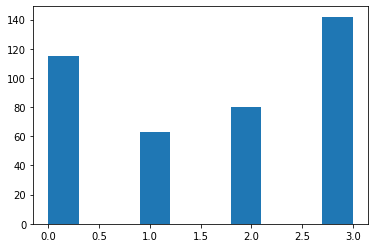

In [22]:
plt.hist(prediction)

In [23]:
f = open("houses.csv", "w")
f.write('Index,Hogwarts House\n')
for index, n in enumerate(prediction):
    n = dic2[n]
    f.write(f'{index},{n}\n')
f.close()

In [24]:
result = pd.read_csv('houses.csv')

In [25]:
result

,Index,Hogwarts House
0,0,Hufflepuff
1,1,Ravenclaw
2,2,Gryffindor
3,3,Hufflepuff
4,4,Hufflepuff
...,...,...
395,395,Slytherin
396,396,Hufflepuff
397,397,Hufflepuff
398,398,Ravenclaw


In [26]:
truth = pd.read_csv('./datasets/dataset_truth.csv')
orig = np.array(truth['Hogwarts House'].map(dic0))
pred = prediction.astype(int)
accuracy = 0
for i, value in enumerate(orig):
    if (orig[i] == pred[i]):
        accuracy +=1
accuracy = accuracy / len(pred) * 100
print('Accuracy: {:.5}%'.format(accuracy))

Accuracy: 98.5%


In [27]:
from sklearn.metrics import accuracy_score
print(accuracy_score(orig,pred) * 100)

98.5


In [28]:
print(result.head(10))

   Index Hogwarts House
0      0     Hufflepuff
1      1      Ravenclaw
2      2     Gryffindor
3      3     Hufflepuff
4      4     Hufflepuff
5      5      Slytherin
6      6      Ravenclaw
7      7     Hufflepuff
8      8      Ravenclaw
9      9     Hufflepuff


In [29]:
print(truth['Hogwarts House'].head(10))

0    Hufflepuff
1     Ravenclaw
2    Gryffindor
3    Hufflepuff
4    Hufflepuff
5     Slytherin
6     Ravenclaw
7    Hufflepuff
8     Ravenclaw
9    Hufflepuff
Name: Hogwarts House, dtype: object
